In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [2]:
dataset = pd.read_csv("weatherAUS.csv")
df=pd.DataFrame(dataset)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.drop(columns=['Date'], inplace=True)

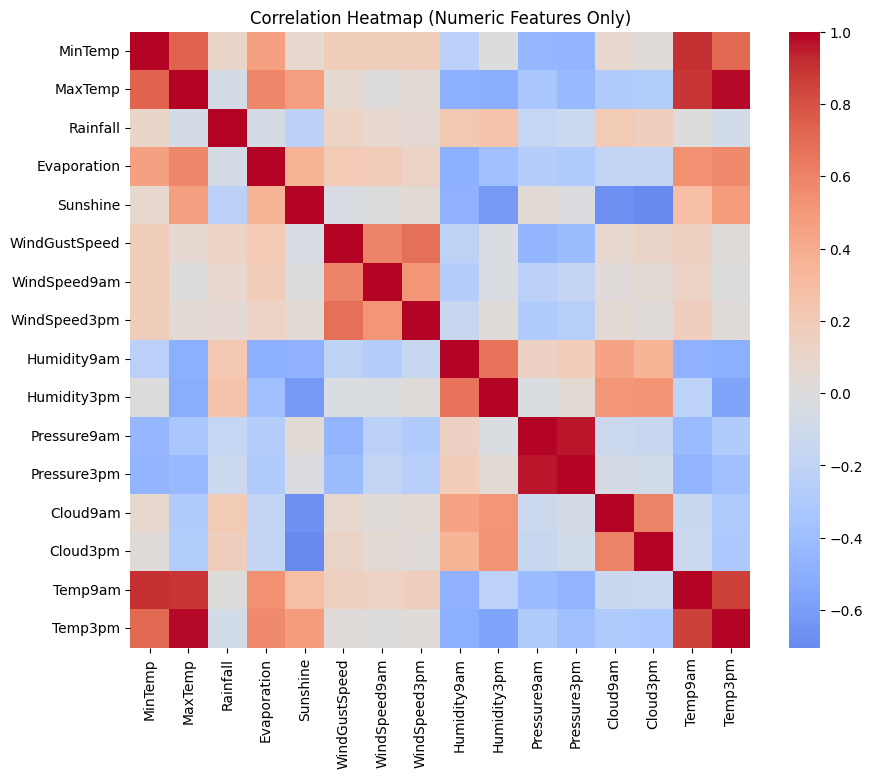

In [4]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

In [5]:
df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
(df.isnull().sum() / len(df)) * 100


Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [7]:
df = df.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1)


In [8]:
num_cols = df.select_dtypes(include=[np.number]).columns


In [9]:
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


In [10]:
cat_cols = df.select_dtypes(include=['object']).columns


In [11]:
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [12]:
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})
df=df.dropna(subset=['RainToday'])

In [13]:

cat_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [14]:
df = df.dropna(subset=['RainTomorrow'])

In [15]:
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})


In [16]:
(df.isnull().sum() / len(df)) * 100


Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [17]:
cat_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [18]:
X = df.drop('RainTomorrow', axis=1).to_numpy(dtype=float)
y = df['RainTomorrow'].to_numpy(dtype=int)


In [19]:
np.random.seed(42)
indices = np.random.permutation(len(X))
split = int(0.8 * len(X))
X_train = X[indices[:split]]
X_test  = X[indices[split:]]

y_train = y[indices[:split]]
y_test  = y[indices[split:]]


In [20]:
mean = X_train.mean(axis=0)
std  = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_test  = (X_test  - mean) / std

In [21]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [22]:
def predict_probability(X, w, b):
    z = np.dot(X, w) + b
    return sigmoid(z)

In [23]:
def compute_cost(y, y_hat):
    m = len(y)
    eps = 1e-15  
    y_hat = np.clip(y_hat, eps, 1 - eps)
    cost = - (1/m) * np.sum(
        y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)
    )
    return cost

In [24]:
def gradient_descent(X, y, alpha = 0.02, epochs=3000):
    m, n = X.shape
    w = np.zeros(n)
    b = 0

    for i in range(epochs):
        y_hat = predict_probability(X, w, b)

        dw = (1/m) * np.dot(X.T, (y_hat - y))
        db = (1/m) * np.sum(y_hat - y)

        w -= alpha * dw
        b -= alpha * db

        if i % 100 == 0:
            cost = compute_cost(y, y_hat)
            print(f"Epoch {i}, Cost: {cost:.4f}")

    return w, b


In [25]:
w, b = gradient_descent(X_train, y_train, alpha=0.02, epochs=3000)


Epoch 0, Cost: 0.6931
Epoch 100, Cost: 0.5058
Epoch 200, Cost: 0.4465
Epoch 300, Cost: 0.4178
Epoch 400, Cost: 0.4016
Epoch 500, Cost: 0.3916
Epoch 600, Cost: 0.3849
Epoch 700, Cost: 0.3802
Epoch 800, Cost: 0.3767
Epoch 900, Cost: 0.3742
Epoch 1000, Cost: 0.3722
Epoch 1100, Cost: 0.3706
Epoch 1200, Cost: 0.3694
Epoch 1300, Cost: 0.3684
Epoch 1400, Cost: 0.3675
Epoch 1500, Cost: 0.3668
Epoch 1600, Cost: 0.3663
Epoch 1700, Cost: 0.3658
Epoch 1800, Cost: 0.3654
Epoch 1900, Cost: 0.3650
Epoch 2000, Cost: 0.3647
Epoch 2100, Cost: 0.3644
Epoch 2200, Cost: 0.3642
Epoch 2300, Cost: 0.3640
Epoch 2400, Cost: 0.3638
Epoch 2500, Cost: 0.3637
Epoch 2600, Cost: 0.3635
Epoch 2700, Cost: 0.3634
Epoch 2800, Cost: 0.3633
Epoch 2900, Cost: 0.3632


In [26]:
def predict(X, w, b, threshold=0.5):
    probs = predict_probability(X, w, b)
    return (probs >= threshold).astype(int)


In [27]:
y_pred = predict(X_test, w, b)

accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)


Accuracy: 0.8436683624364086
